# Clustering Tut for Machine learning 2021
### by Alex Vogt (Student number: 2152320)
#### References:
* [Geeksforgeeks for Image Processing with regards to k-means image segmentation](https://www.geeksforgeeks.org/image-segmentation-using-k-means-clustering/?ref=rp)

## Question 3

**Imports needed**

In [3]:
import numpy as np
import matplotlib.cbook as cbook 
import matplotlib.image as image 
import matplotlib.pyplot as plt
import imageio
import cv2
%matplotlib inline

**Defining helper functions and functions needed for the questions**

In [7]:
# Distance function (euclidean)
def d(x1,x2):
    return np.sqrt(sum(np.square(np.power((x1-x2),2))))

# Takes in image, reads it, and makes the values smaller to work with
def read_image(img):    
    image = cv2.imread(img)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    #image = image / 255

    return image

# Reshapes image into (x*y, RGB) matrix and initializes random n clusters for n = k value
def clusters(image, kval):
    image1 = np.float32(image)
    imageMatrix = np.reshape(image1, (image1.shape[0] * image1.shape[1], image1.shape[2]))  

    #print(imageMatrix.shape)

    m, n = imageMatrix.shape

    k = kval
    
    centroids = np.zeros((k, n))
    
    #print(centroids)

    
    for i in range(k): 
            rand1 = int(np.random.randint(len(imageMatrix)))
            rand2 = int(np.random.randint(len(imageMatrix)))
            rand3 = int(np.random.randint(len(imageMatrix)))
            centroids[i, 0] = imageMatrix[rand1, 0] 
            centroids[i, 1] = imageMatrix[rand2, 1] 
            centroids[i, 2] = imageMatrix[rand3, 2]
    
    return imageMatrix, centroids


def k_means(imageMatrix, centroids, kval):
    
    k_no = kval
    m, n = imageMatrix.shape
    
    x = np.zeros(2)
    y = np.zeros(2)
    
    centroids_old = np.zeros((k_no, n))

    for i in range(k_no): 
            rand1 = int(np.random.randint(len(imageMatrix)))
            rand2 = int(np.random.randint(len(imageMatrix)))
            centroids_old[i, 0] = imageMatrix[rand1, 0] 
            centroids_old[i, 1] = imageMatrix[rand2, 1]
            
    # these are the index values that each pixel gets assinged to 
    index = np.zeros(m)
    
    
    # k-means                    d(centroids[0], centroids_old[0]) > 1e-20
    while(d(centroids[0], centroids_old[0]) > 1e-20): 
        #print(d(centroids[0], centroids_old[0]))
        centroids_old = centroids
        
        for j in range(len(imageMatrix)): 

            # initialize minimum value to a large value 
            minimum = 1000
            temp = None

            for l in range(k_no):
                
                x[0] = imageMatrix[j, 0]
                x[1] = imageMatrix[j, 1]
                y[0] = centroids[l, 0]
                y[1] = centroids[l, 1]

                if(d(x,y) < minimum):          
                    minimum = d(x,y) 
                    temp = l 
                    index[j] = l  
                                        
        # Changing centroid position
        for k in range(k_no): 

            sumx = 0 
            sumy = 0
            count = 0

            for j in range(len(imageMatrix)): 

                if(index[j] == k): 
                    sumx += imageMatrix[j, 0] 
                    sumy += imageMatrix[j, 1]  
                    count += 1

            if(count == 0): 
                count = 1    

            centroids[k, 0] = float(sumx / count) 
            centroids[k, 1] = float(sumy / count)      
   
    return centroids, index, centroids_old

# Restores the image into correct shape with assigning RGB values of cluster to specific pixel
def compress(centroids, index, image):    
    imgCompressed = centroids[index.flatten().astype(int)]
    imgCompressed = np.reshape(imgCompressed, (image.shape[0], image.shape[1], image.shape[2]))
    #print(imgCompressed)
    plt.imshow(imgCompressed) 
    plt.show()

### Q 3a
**Loading in the image**

This is the original image:


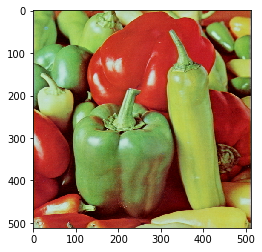

In [8]:
print('This is the original image:')

O_image = plt.imread('peppers.bmp')
plt.imshow(O_image)
plt.show()

### Q 3b
**k-means cluster**

In [9]:
image = read_image('peppers.bmp')

kval = 2
imageMatrix, centroids = clusters(image, kval) 
centroids = np.uint8(centroids)
centroids, index, centroids_old = k_means(imageMatrix, centroids, kval)
print("Centroids:")
print(centroids)

TypeError: only size-1 arrays can be converted to Python scalars

### Q 3c
**Displaying image with only two clusters** 

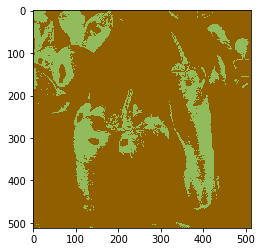

In [62]:
compress(centroids, index, image)

### Q 3d
**Repeating the process on two other images for k = {4,8,16,32,64}**

This is the original image:


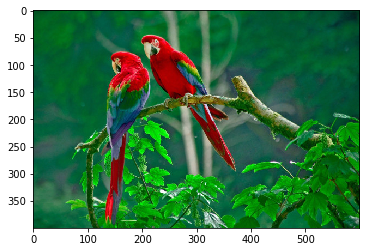

This is the image that has been compressed with 2 clusters:


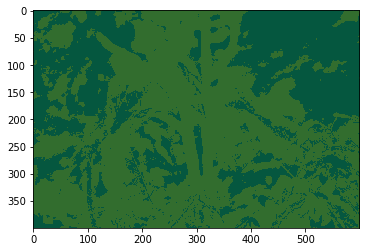

This is the image that has been compressed with 4 clusters:


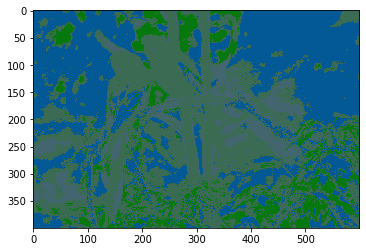

This is the image that has been compressed with 8 clusters:


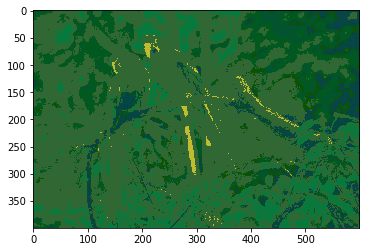

This is the image that has been compressed with 16 clusters:


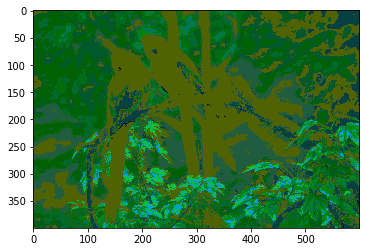

This is the image that has been compressed with 32 clusters:


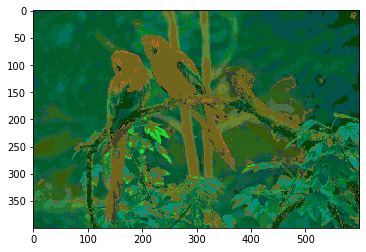

This is the image that has been compressed with 64 clusters:


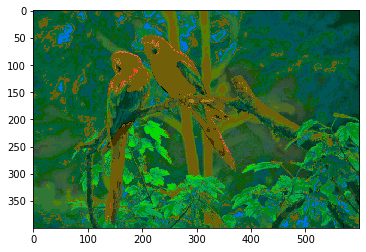

In [21]:
print('This is the original image:')

O_image2 = plt.imread('bird3.jpg')
plt.imshow(O_image2)
plt.show()

image2 = read_image('bird3.jpg')

kval2 = 2

imageMatrix, centroids = clusters(image2, kval2) 
centroids = np.uint8(centroids)
centroids, index, centroids_old = k_means(imageMatrix, centroids, kval2) 
print('This is the image that has been compressed with', kval2, 'clusters:')
compress(centroids, index, image2)

kval2 = 4

imageMatrix, centroids = clusters(image2, kval2) 
centroids = np.uint8(centroids)
centroids, index, centroids_old = k_means(imageMatrix, centroids, kval2) 
print('This is the image that has been compressed with', kval2, 'clusters:')
compress(centroids, index, image2)

kval2 = 8

imageMatrix, centroids = clusters(image2, kval2)
centroids = np.uint8(centroids)
centroids, index, centroids_old = k_means(imageMatrix, centroids, kval2) 
print('This is the image that has been compressed with', kval2, 'clusters:')
compress(centroids, index, image2)

kval2 = 16

imageMatrix, centroids = clusters(image2, kval2)
centroids = np.uint8(centroids)
centroids, index, centroids_old = k_means(imageMatrix, centroids, kval2) 
print('This is the image that has been compressed with', kval2, 'clusters:')
compress(centroids, index, image2)

kval2 = 32

imageMatrix, centroids = clusters(image2, kval2)
centroids = np.uint8(centroids)
centroids, index, centroids_old = k_means(imageMatrix, centroids, kval2) 
print('This is the image that has been compressed with', kval2, 'clusters:')
compress(centroids, index, image2)

kval2 = 64

imageMatrix, centroids = clusters(image2, kval2)
centroids = np.uint8(centroids)
centroids, index, centroids_old = k_means(imageMatrix, centroids, kval2) 
print('This is the image that has been compressed with', kval2, 'clusters:')
compress(centroids, index, image2)

This is the original image:


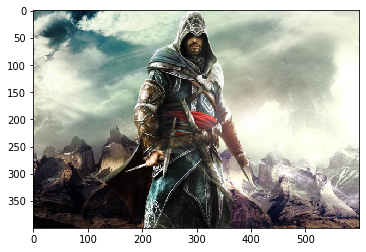

This is the image that has been compressed with 2 clusters:


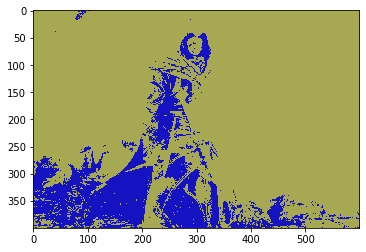

This is the image that has been compressed with 4 clusters:


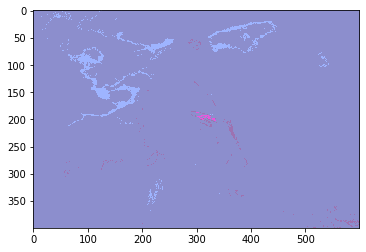

This is the image that has been compressed with 8 clusters:


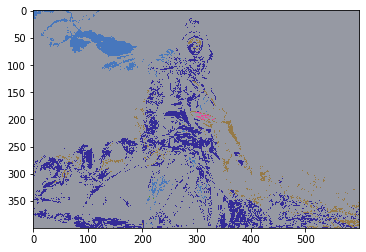

This is the image that has been compressed with 16 clusters:


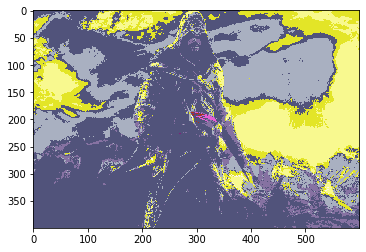

This is the image that has been compressed with 32 clusters:


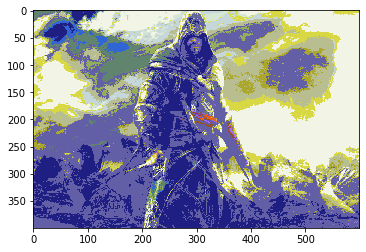

This is the image that has been compressed with 64 clusters:


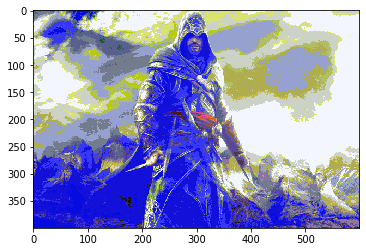

In [13]:
print('This is the original image:')

O_image2 = plt.imread('AC4.jpg')
plt.imshow(O_image2)
plt.show()

image2 = read_image('AC4.jpg')

kval2 = 2

imageMatrix, centroids = clusters(image2, kval2) 
centroids = np.uint8(centroids)
centroids, index, centroids_old = k_means(imageMatrix, centroids, kval2) 
print('This is the image that has been compressed with', kval2, 'clusters:')
compress(centroids, index, image2)

kval2 = 4

imageMatrix, centroids = clusters(image2, kval2) 
centroids = np.uint8(centroids)
centroids, index, centroids_old = k_means(imageMatrix, centroids, kval2) 
print('This is the image that has been compressed with', kval2, 'clusters:')
compress(centroids, index, image2)

kval2 = 8

imageMatrix, centroids = clusters(image2, kval2)
centroids = np.uint8(centroids)
centroids, index, centroids_old = k_means(imageMatrix, centroids, kval2) 
print('This is the image that has been compressed with', kval2, 'clusters:')
compress(centroids, index, image2)

kval2 = 16

imageMatrix, centroids = clusters(image2, kval2)
centroids = np.uint8(centroids)
centroids, index, centroids_old = k_means(imageMatrix, centroids, kval2) 
print('This is the image that has been compressed with', kval2, 'clusters:')
compress(centroids, index, image2)

kval2 = 32

imageMatrix, centroids = clusters(image2, kval2)
centroids = np.uint8(centroids)
centroids, index, centroids_old = k_means(imageMatrix, centroids, kval2) 
print('This is the image that has been compressed with', kval2, 'clusters:')
compress(centroids, index, image2)

kval2 = 64

imageMatrix, centroids = clusters(image2, kval2)
centroids = np.uint8(centroids)
centroids, index, centroids_old = k_means(imageMatrix, centroids, kval2) 
print('This is the image that has been compressed with', kval2, 'clusters:')
compress(centroids, index, image2)

**What did notice**
* The first thing that was noticable was the fact that as the k-value increased the the k-means algorithm took longer to run
* I also noticed that as the k-value increased the image got increasingly detailed with respect to the value for k
* I started to notice that the k-value is directly proportional to the number of colors that would be shown in the given image